Probability Density of a Travelling Wave

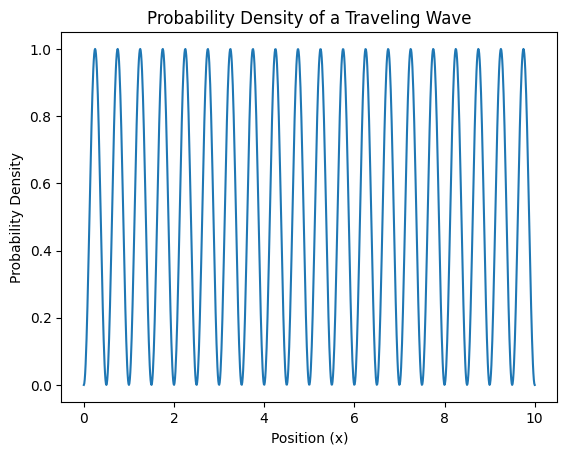

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 1  # Amplitude
k = 2 * np.pi / 1  # Wave number (wavelength = 1 unit)
omega = 2 * np.pi  # Angular frequency (corresponding to 1 Hz frequency)
x = np.linspace(0, 10, 1000)  # Space domain
t = 0  # Initial time

# Wave function
psi = A * np.sin(k * x - omega * t)

# Probability density
rho = np.abs(psi)**2

# Plotting the probability density
plt.plot(x, rho, label=r'$\rho(x,t) = |A sin(kx - \omega t)|^2$')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.title('Probability Density of a Traveling Wave')
plt.show()


Momentum Operator


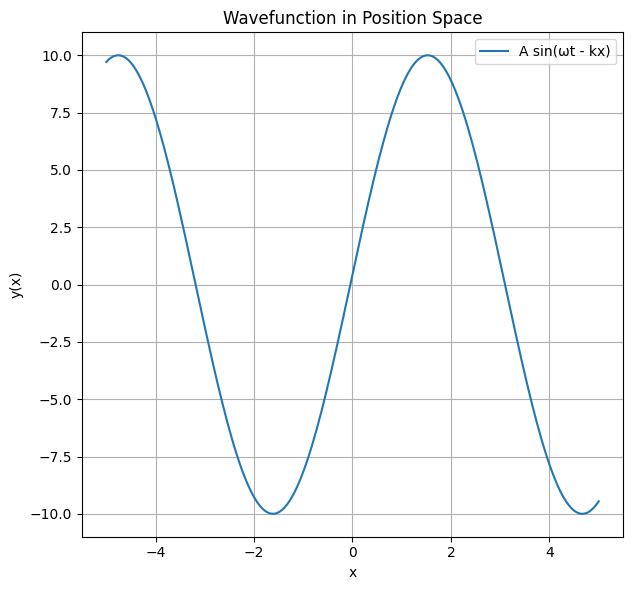

In [11]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0  # Planck's constant (set to 1 for simplicity)
L = 10.0    # Length of the spatial domain
N = 200     # Number of grid points

x = np.linspace(-L / 2, L / 2, N)
dx = x[1] - x[0]

# Momentum operator (finite difference approximation)
p_operator = -1j * hbar * (np.diag(np.ones(N-1), 1) - np.diag(np.ones(N-1), -1)) / (2 * dx)

def traveling_wave(A, omega, k, t):
    
    real_part = A * np.sin(omega * t - k * x)
    return real_part
 

A = float(input("Enter amplitude (A): "))
omega = float(input("Enter angular frequency (ω): "))
k = float(input("Enter wave number (k): "))
t = float(input("Enter time (t): "))


wave_real = traveling_wave(A, omega, k, t)
wavefunction = wave_real + 1j * np.zeros_like(wave_real)  # Convert to complex form

momentum_wavefunction = p_operator @ wavefunction
p_expectation = np.real(np.vdot(wavefunction, momentum_wavefunction))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, wave_real, label=f'A sin(ωt - kx)')
plt.title('Wavefunction in Position Space')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




Hamiltonian / Total Energy Operator (includes KE and PE operators too)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0  # Planck's constant (set to 1 for simplicity)
m = 1.0     # Mass of the particle (set to 1 for simplicity)
L = 10.0    # Length of the spatial domain
N = 200     # Number of grid points

x = np.linspace(-L / 2, L / 2, N)
dx = x[1] - x[0]

kinetic_energy = (-hbar**2 / (2 * m)) * (
    -2 * np.diag(np.ones(N)) +
    np.diag(np.ones(N-1), 1) +
    np.diag(np.ones(N-1), -1)
) / dx**2

def potential_energy(x):
    return np.zeros_like(x)  # Zero potential for free particle

V = np.diag(potential_energy(x))


H = kinetic_energy + V

def traveling_wave(A, omega, k, t):
    real_part = A * np.sin(omega * t - k * x)
    wavefunction = real_part + 1j * np.zeros_like(real_part)  # Convert to complex form
    return wavefunction


A = float(input("Enter amplitude (A): "))
omega = float(input("Enter angular frequency (ω): "))
k = float(input("Enter wave number (k): "))
t = float(input("Enter time (t): "))

wavefunction = traveling_wave(A, omega, k, t)

#normalizing
wavefunction /= np.sqrt(np.sum(np.abs(wavefunction)**2) * dx)


energy_wavefunction = H @ wavefunction

E_expectation = np.real(np.vdot(wavefunction, energy_wavefunction))

print("Amplitude: ",A)
print("Angular frequency: ",omega)
print("Wave number / Propagating constant: ",k)
print("Time: ",t)


print(f"Expectation value of energy: {E_expectation:.3f} (in units of h)")


Amplitude:  10.0
Angular frequency:  60.0
Wave number / Propagating constant:  1.0
Time:  1.0
Expectation value of energy: 72.348 (in units of h)
